In [1]:
library(data.table)
library(ggplot2)

# library(ggpubr)

In [2]:
G_corr_folder = "/hps/nobackup/stegle/users/galvari/data/iPSCs/singleCell/tidy/prepro_statistics/singleCell/"

In [3]:
list.files(G_corr_folder)

[1] "auto_corr.tsv"                     "cell_autocorr_percell_10x.tsv"    
 [3] "cell_autocorr_percell_day0.tsv"    "cell_autocorr_percell_defendo.tsv"
 [5] "cell_autocorr_percell_mesendo.tsv" "cell_autocorr_percell.tsv"        
 [7] "cell_autocorr_perrun_10x.tsv"      "cell_autocorr_perrun_day0.tsv"    
 [9] "cell_autocorr_perrun_defendo.tsv"  "cell_autocorr_perrun_mesendo.tsv" 
[11] "cell_autocorr_perrun.tsv"          "cell_stats.tsv"                   
[13] "cell_stats10x.tsv"                 "singleCellsummary.tsv"

In [4]:
auto_corr_filename = paste0(G_corr_folder, list.files(G_corr_folder)[1])
auto_corr = read.csv(auto_corr_filename, sep = " ")
head(auto_corr)

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

,X25476_4.268,X25476_7.196,X25476_7.114,X25476_7.51,X25476_4.161,X25476_4.64,X25476_4.167,X25476_7.349,X25476_4.59,X25476_4.186,...,X23794_1.81,X23794_1.44,X23794_1.352,X23794_1.35,X23794_1.106,X23794_1.78,X23794_1.30,X23794_1.209,X23794_1.201,X23794_1.178
25476_4#268,1.0000000,0.9859830,0.9847665,0.9902602,0.9860173,0.9556595,0.9800413,0.9868559,0.9916719,0.9873895,...,0.9779865,0.9791470,0.9711416,0.9789865,0.9770345,0.9769775,0.9773742,0.9771055,0.9620972,0.9752675
25476_7#196,0.9859830,1.0000000,0.9884908,0.9848121,0.9813945,0.9325109,0.9699034,0.9852286,0.9876862,0.9876757,...,0.9797334,0.9818559,0.9798977,0.9864068,0.9828332,0.9826549,0.9846059,0.9845855,0.9788610,0.9823285
25476_7#114,0.9847665,0.9884908,1.0000000,0.9848909,0.9819734,0.9422318,0.9717118,0.9869444,0.9886845,0.9891929,...,0.9825697,0.9846163,0.9805069,0.9879550,0.9832025,0.9856175,0.9870425,0.9871511,0.9746530,0.9831713
25476_7#51,0.9902602,0.9848121,0.9848909,1.0000000,0.9919312,0.9675640,0.9875929,0.9906612,0.9910204,0.9884375,...,0.9716221,0.9800179,0.9625430,0.9759226,0.9754193,0.9763077,0.9731820,0.9718021,0.9516457,0.9683169
25476_4#161,0.9860173,0.9813945,0.9819734,0.9919312,1.0000000,0.9680352,0.9908422,0.9893259,0.9891129,0.9894431,...,0.9646882,0.9782217,0.9571240,0.9735723,0.9734863,0.9753194,0.9704969,0.9669587,0.9481926,0.9643411
25476_4#64,0.9556595,0.9325109,0.9422318,0.9675640,0.9680352,1.0000000,0.9783195,0.9633864,0.9602662,0.9541174,...,0.9205999,0.9388647,0.8995293,0.9202217,0.9302423,0.9307602,0.9198130,0.9145168,0.8748112,0.9086936


In [5]:
### SmartSeq2 data, Giordano's script

In [6]:
run_cor_filename = "/hps/nobackup/stegle/users/galvari/data/iPSCs/singleCell/tidy/prepro_statistics/singleCell/cell_autocorr_perrun.tsv"
run_cor = read.csv(run_cor_filename, sep = "\t")
nrow(run_cor)
head(run_cor,2)

[1] 35

run,median
21554_3,0.536445
21672_1,0.982504


In [7]:
run_cor$run = as.character(run_cor$run)
length(unique(run_cor$run))
length(unique(run_cor[run_cor$median < 0.7,]$run))
unique(run_cor[run_cor$median < 0.7,]$run)

[1] 35

[1] 5

[1] "21554_3" "22139_6" "22606_3" "22606_5" "22606_8"

In [8]:
sample_cor_filename = "/hps/nobackup/stegle/users/galvari/data/iPSCs/singleCell/tidy/prepro_statistics/singleCell/cell_autocorr_percell.tsv"
sample_cor = read.csv(sample_cor_filename, sep = "\t")
nrow(sample_cor)
head(sample_cor,2)

[1] 7611

cell,medianCorr,donor,run,combo
21672_1#101,0.5946648,zapk_3,21672_1,zapk_3_21672_1
21672_1#102,0.9400848,wibj_2,21672_1,wibj_2_21672_1


In [10]:
length(unique(sample_cor$medianCorr))

[1] 7610

In [9]:
sample_cor = sample_cor[!(sample_cor$run %in% c('21554_3','22139_6','22606_3','22606_5','22606_8')),]

In [10]:
sample_cor$donor = as.character(sample_cor$donor)
length(unique(sample_cor$donor)[order(unique(sample_cor$donor))])

[1] 89

In [11]:
head(sample_cor[order(sample_cor$medianCorr),],2)

,cell,medianCorr,donor,run,combo
55,21672_1#169,0.0992361,vass_1,21672_1,vass_1_21672_1
64,21672_1#18,0.1088894,pelm_3,21672_1,pelm_3_21672_1


In [31]:
nrow(sample_cor)

[1] 7611

In [44]:
length(unique(sample_cor$combo))
length(unique(sample_cor[sample_cor$medianCorr>0.5,'donor']))

[1] 155

[1] 89

In [12]:
pca_filename = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/day0_healthy/concatSingleCell_norm_log_PCA10.tsv"
pca = read.csv(pca_filename, sep = '\t')
nrow(pca)
head(pca,2)

[1] 9326

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
25476_4#132,1.535766,-0.1504774,1.780571,1.088653,0.6422207,-0.05850989,-3.328981,0.5004114,-0.5342698,-1.0387284
25476_4#324,1.075554,1.2441418,1.099367,2.225085,0.2587769,2.15462710,-0.952148,-1.2531468,0.7848472,0.1406137


In [13]:
summary_filename = "/hps/nobackup/stegle/users/galvari/data/iPSCs/singleCell/tidy/prepro_statistics/singleCell/cell_stats.tsv"
summary = read.csv(summary_filename, sep = " ")
head(summary,2)

,readdepth,n_genes,mean,std,batch,run,cluster,cor_median,keep
25476_4#268,158067,8542,2.482325,43.82972,expt_40,25476_4,1,0.9723427,TRUE
25476_7#196,127882,8237,2.008292,39.16857,expt_43,25476_7,1,0.9800051,TRUE


In [14]:
length(unique(rownames(summary)))
length(unique(rownames(summary))[unique(rownames(summary)) %in% unique(rownames(pca))])

[1] 8344

[1] 8344

In [15]:
nrow(summary)
nrow(summary[summary$keep == FALSE,])

[1] 8344

[1] 739

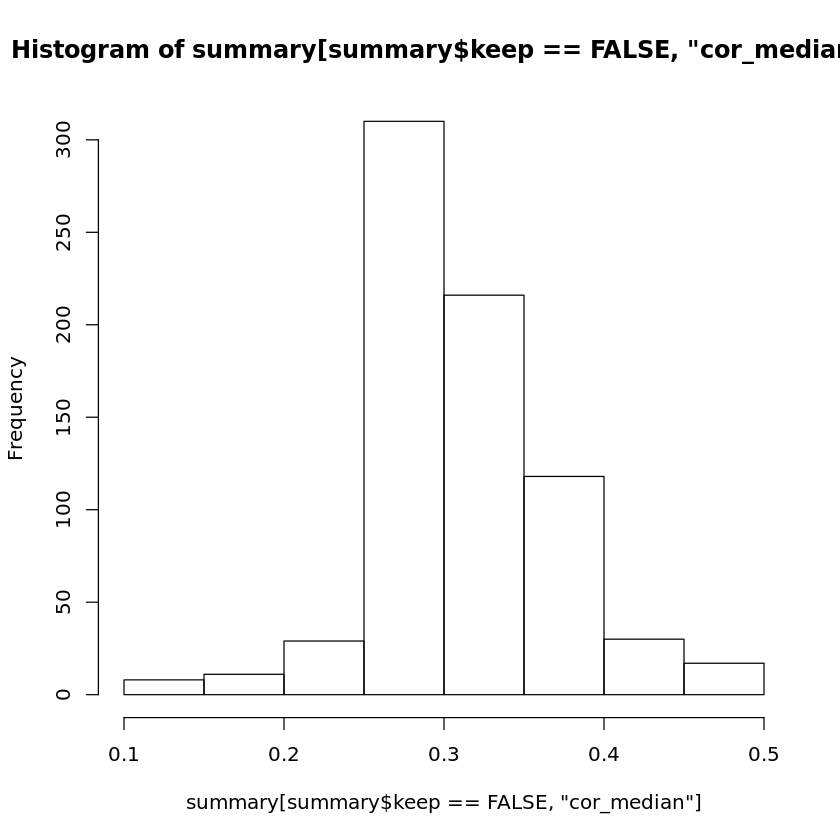

In [16]:
hist(summary[summary$keep == FALSE,'cor_median'])

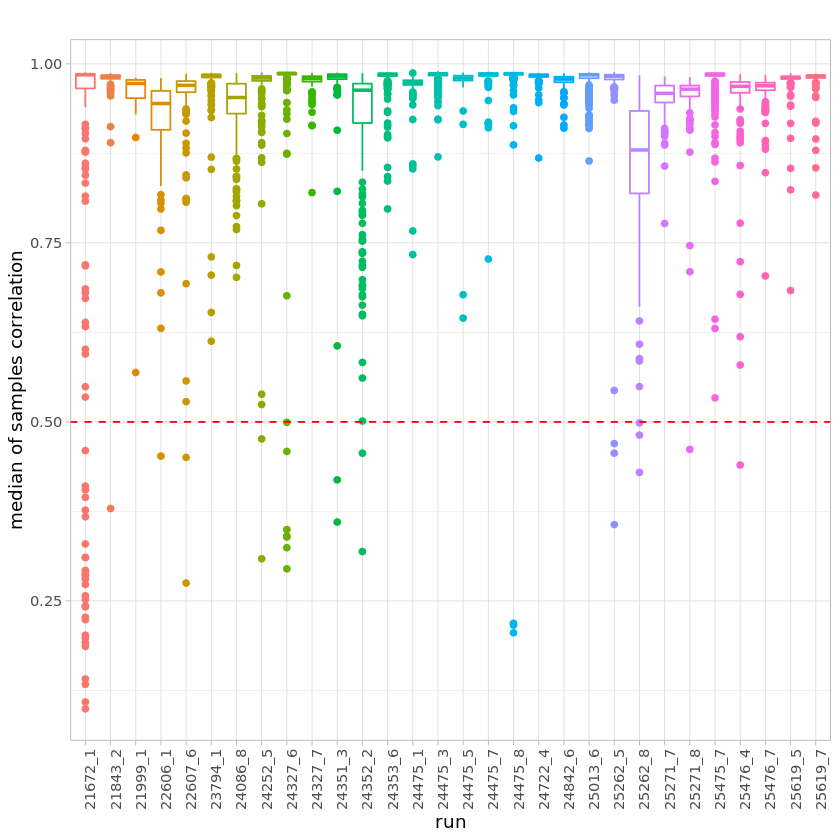

In [17]:
ggplot(sample_cor,aes(x=run,y=medianCorr,col=run)) + geom_boxplot() + 
    labs(title="",y="median of samples correlation",x="run") + 
    geom_hline(yintercept=.5, linetype="dashed", color = "red") + theme_light() + 
    theme(legend.position="none",axis.text.x = element_text(angle = 90))
#     theme(axis.text.x = element_text(angle = 90))

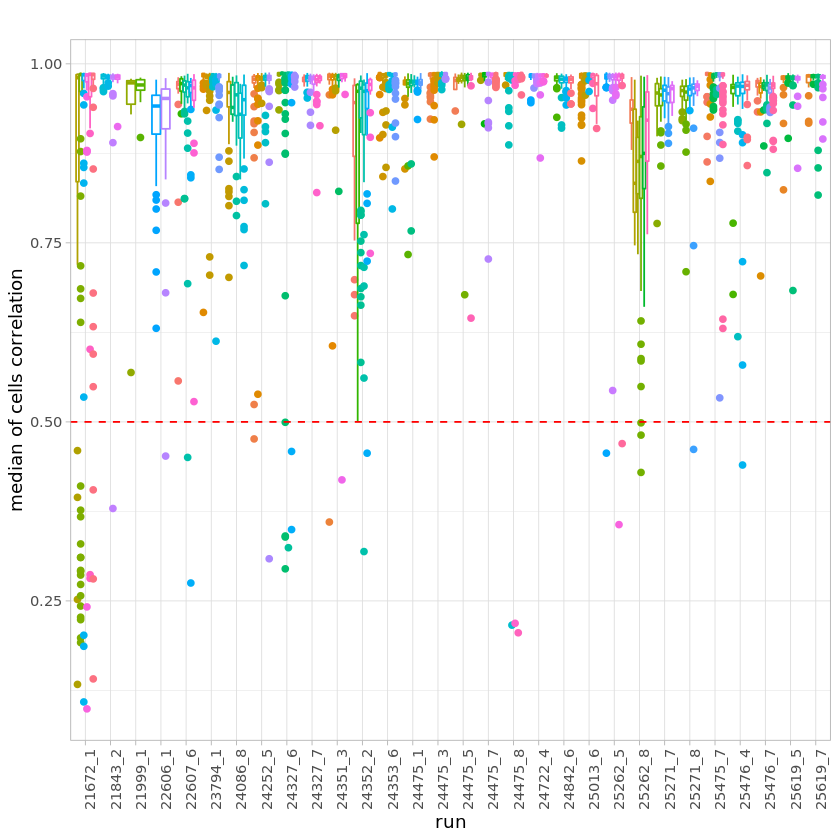

In [11]:
ggplot(sample_cor,aes(x=run,y=medianCorr,col=donor)) + geom_boxplot() + 
    labs(title="",y="median of cells correlation",x="run") + 
    geom_hline(yintercept=.5, linetype="dashed", color = "red") + theme_light() + 
    theme(legend.position="none",axis.text.x = element_text(angle = 90))
#     theme(axis.text.x = element_text(angle = 90))

In [12]:
fig_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/figures/"

In [13]:
pdf(paste0(fig_dir,"cellQC_step2.pdf"), width=7, height=9)
ggplot(sample_cor,aes(x=run,y=medianCorr,col=donor)) + geom_boxplot() + 
    labs(title="",y="median of cells correlation",x="run") + 
    geom_hline(yintercept=.5, linetype="dashed", color = "red") + theme_light() + 
    theme(legend.position="none",axis.text.x = element_text(angle = 90))
dev.off()

png 
  2

In [18]:
head(run_cor)

run,median
21554_3,0.5364450
21672_1,0.9825040
21843_2,0.9793601
21999_1,0.9706584
22139_6,0.3133787
22606_1,0.9417111


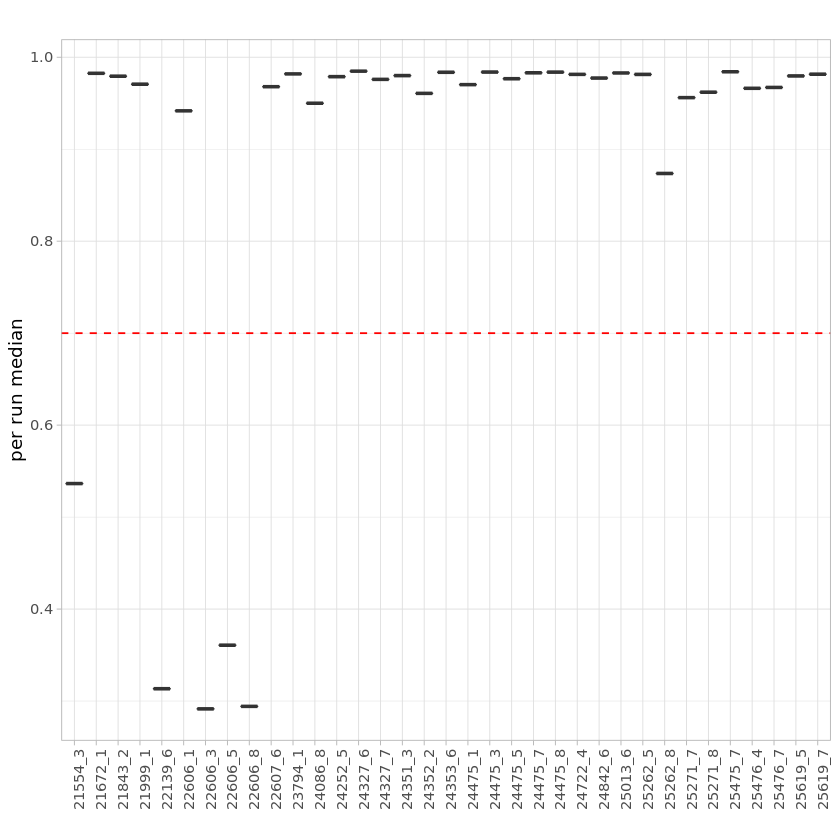

In [14]:
ggplot(run_cor,aes(x=run,y=median)) + geom_boxplot() + labs(title="",y="per run median",x="") + 
    geom_hline(yintercept=.7, linetype="dashed", color = "red")+ theme_light() + 
    theme(legend.position="none", axis.text.x = element_text(angle = 90))

In [15]:
pdf(paste0(fig_dir,"cellQC_step1.pdf"), width=7, height=9)
ggplot(run_cor,aes(x=run,y=median)) + geom_boxplot() + labs(title="",y="per run median",x="") + 
    geom_hline(yintercept=.7, linetype="dashed", color = "red")+ theme_light() + 
    theme(legend.position="none", axis.text.x = element_text(angle = 90))
dev.off()

png 
  2

In [23]:
nrow(pca)
pca$keep <- ifelse(rownames(pca) %in% subset(sample_cor,sample_cor$median >.5)$cell,TRUE,FALSE)
nrow(pca[pca$keep,])

[1] 9326

[1] 7553

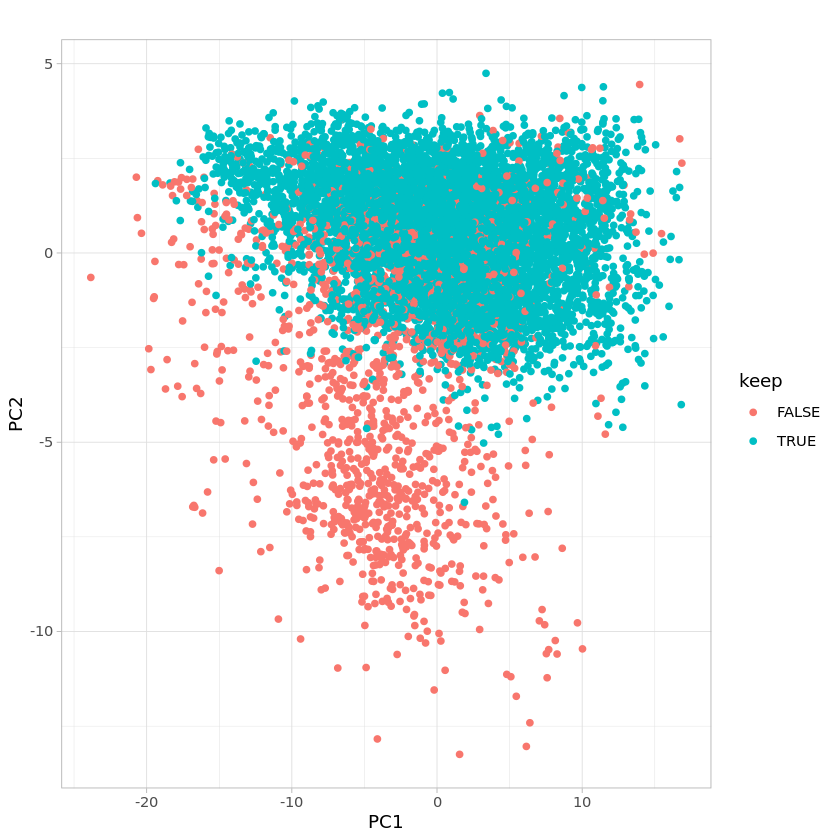

In [32]:
pca$keep <- ifelse(rownames(pca) %in% subset(sample_cor,sample_cor$median >.5)$cell,TRUE,FALSE)
#pca_total$run <- summary$run[match(pca_total$V1,summary$V1)]
ggplot(pca,aes(x=PC1,y=PC2,col=keep)) + geom_point() + labs(title="") + theme_light() #+ theme(legend.position="none")

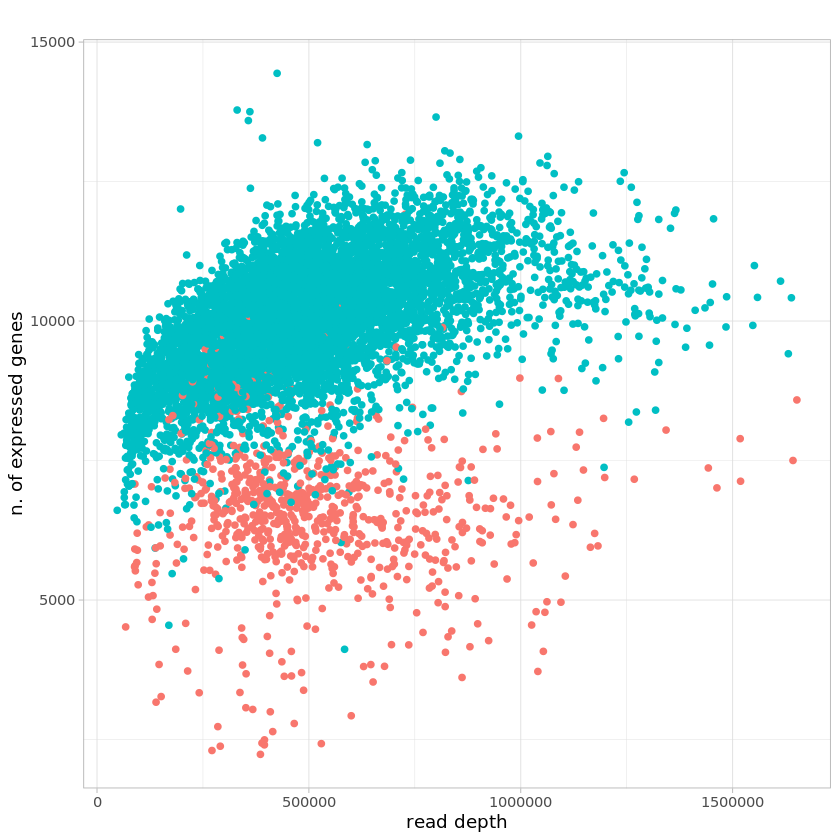

In [36]:
summary$keep  <- ifelse(rownames(summary) %in% subset(sample_cor,sample_cor$median >.5)$cell,TRUE,FALSE)
ggplot(summary,aes(x=readdepth,y=n_genes,col=keep)) + geom_point() + labs(title="",x="read depth",y="n. of expressed genes") + theme_light() + theme(legend.position="none")

In [41]:
filename = "/hps/nobackup/stegle/users/galvari/data/neuroseq/metadata/smf/neuroseq_day11_FPP_meta.tsv"
df = read.csv(filename, sep = "\t")
head(df)

index,batch,donor_id,sample_id,cluster_id,time_point,pool_id,treatment,n_counts_all,celltype
AAACCTGAGGAATGGA-1-0,0,HPSI0114i-eipl_1,5245STDY7352549,0,D11,pool1,NONE,14383,FPP
AAACCTGGTAGGCATG-1-0,0,HPSI0114i-eipl_1,5245STDY7352549,0,D11,pool1,NONE,11709,FPP
AAACCTGGTCGAGATG-1-0,0,HPSI0714i-iudw_1,5245STDY7352549,0,D11,pool1,NONE,10841,FPP
AAACCTGGTGCGGTAA-1-0,0,HPSI1113i-podx_1,5245STDY7352549,0,D11,pool1,NONE,9836,FPP
AAACCTGTCGCAGGCT-1-0,0,HPSI0214i-eiwy_1,5245STDY7352549,0,D11,pool1,NONE,12742,FPP
AAACGGGAGAGTAATC-1-0,0,HPSI0714i-iudw_1,5245STDY7352549,0,D11,pool1,NONE,10425,FPP


In [42]:
length(unique(df$donor_id))
length(unique(df$sample_id))

[1] 177

[1] 38

In [43]:
donor_run = paste0(df$donor_id,"-",df$sample_id)
length(unique(donor_run))

[1] 702

In [33]:
###
# 10x
# Correlation QC
# run_correlation <- fread("/hps/nobackup/stegle/users/galvari/data/iPSCs/singleCell/tidy/prepro_statistics/singleCell/cell_autocorr_perrun_10x.tsv")
sample_correlation <- fread("/hps/nobackup/stegle/users/galvari/data/iPSCs/singleCell/tidy/prepro_statistics/singleCell/cell_autocorr_percell_10x.tsv")
# pca_total <- fread("/hps/nobackup/hipsci/scratch/ComparingQtlMapping/10x/SingleCell/day0_healthy/sc10x_barcode_PCA10.tsv")
# summary <- fread("/hps/nobackup/stegle/users/galvari/data/iPSCs/singleCell/tidy/prepro_statistics/singleCell/cell_stats10x.tsv")
sample_correlation <- sample_correlation[,-c("V1")]

Warning message in fread("/hps/nobackup/stegle/users/galvari/data/iPSCs/singleCell/tidy/prepro_statistics/singleCell/cell_autocorr_percell_10x.tsv"):
“Detected 8 column names but the data has 9 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

In [34]:
head(sample_correlation)

cell,medianCorr,dataset,day,donor,donorRNA,run
AAACCTGAGACCTTTG-1,0.8359634,3,day0,eipl_1,HPSI0114i-eipl_1,expt41
AAACCTGAGACGCTTT-1,0.9083546,3,day0,eipl_1,HPSI0114i-eipl_1,expt41
AAACCTGAGCCCAACC-1,0.9283405,4,day0,kuxp_1,HPSI1013i-kuxp_1,expt43
AAACCTGAGCGTCAAG-1,0.9254806,1,day0,lepk_1,HPSI0614i-lepk_1,expt31
AAACCTGAGCTAAACA-1,0.9115584,2,day0,tout_1,HPSI0414i-tout_1,expt40
AAACCTGAGCTAGTTC-1,0.9270160,4,day0,yelp_3,HPSI0514i-yelp_3,expt43


In [37]:
sample_correlation$donor_run = paste0(sample_correlation$donor,"-",sample_correlation$run)
length(unique(sample_correlation$run))
length(unique(sample_correlation$donor_run))

[1] 5

[1] 28

In [ ]:
pca <- prcomp(assay(sc10x))

plot1 <- ggplot(sample_correlation,aes(x=run,y=medianCorr,col=donor)) + geom_boxplot() + labs(title="",y="median of samples correlation",x="run") + geom_hline(yintercept=.5, linetype="dashed", color = "red") + theme_light() + theme(legend.position="none",axis.text.x = element_text(angle = 90))
plot2 <- ggplot(run_correlation,aes(x="run",y=median)) + geom_boxplot() + labs(title="",y="per run median",x="") + geom_hline(yintercept=.7, linetype="dashed", color = "red")+ theme_light() + theme(legend.position="none")
pca_total$keep <- ifelse(pca_total$V1 %in% subset(sample_correlation,sample_correlation$medianCorr >.5)$cell,TRUE,FALSE)
#pca_total$run <- summary$run[match(pca_total$V1,summary$V1)]
plot3 <- ggplot(pca_total,aes(x=PC1,y=PC2,col=keep)) + geom_point() + labs(title="") + theme_light() + theme(legend.position="none")
summary$keep  <- ifelse(summary$cell %in% subset(sample_correlation,sample_correlation$medianCorr >.5)$cell,TRUE,FALSE)
plot4 <- ggplot(summary,aes(x=readdepth,y=ngenes,col=keep)) + geom_point() + labs(title="",x="read depth",y="n. of expressed genes") + theme_light() + theme(legend.position="none")
ggarrange(ggarrange(plot2,plot1,ncol=2,widths=c(1,5),align="h"),
          ggarrange(plot3,plot4,ncol=2,align="h"),nrow=2,align="v") %>%
              ggexport(filename="/hps/nobackup/stegle/users/galvari/figures/iPSCs/panels/prepro/prepro_pca_10x.pdf")